In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [87]:
base = pd.concat([
    pd.read_csv("Baseline_serial_bertram.csv"),
    pd.read_csv("Baseline_serial_carla.csv"),
    pd.read_csv("Baseline_serial_alex.csv"),
]).reset_index()

fast = pd.concat([
    pd.read_csv("serial_recall_fast05_bertram.csv"),
    pd.read_csv("serial_recall_fast05_carla.csv"),
]).reset_index()

slow = pd.concat([
    pd.read_csv("serial_recall_slow4_carla.csv"),
    pd.read_csv("serial_recall_slow4_2.csv"),
]).reset_index()

dist = pd.concat([
    pd.read_csv("serial_recall_w_distractor_carla.csv"),
    pd.read_csv("serial_recall_w_distractor_bertram.csv"),
]).reset_index()

In [88]:
def serial_get_bools(df):
    lister = []
    for i in range(len(df)):
        response = np.array(df["response"][i].split(","))
        true_list = (np.array(df["sequence"][i].split(",")) == np.pad(response, (0, 8-len(response)), constant_values=(0,99))).astype(np.int32)
        lister.append(true_list)
    lister = np.array(lister)
    return lister

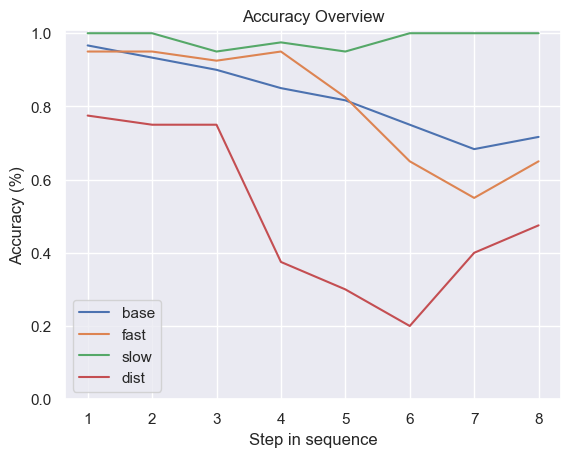

In [89]:
labels = ["base", "fast", "slow", "dist"]
tests = [base, fast, slow, dist]
for i, test in enumerate(tests):
    plt.plot(range(1,9),serial_get_bools(test).mean(0), label=labels[i])
plt.legend(loc="lower left")
plt.title("Accuracy Overview")
plt.xlabel("Step in sequence")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 1.01);

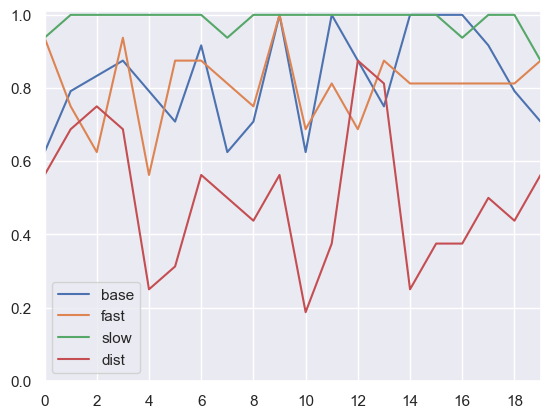

In [90]:
labels = ["base", "fast", "slow", "dist"]
tests = [base, fast, slow, dist]
for i, test in enumerate(tests):
    plt.plot(serial_get_bools(test).reshape((-1,20,8)).mean((0,2)), label=labels[i])
plt.legend()
plt.ylim(0, 1.01)
plt.xlim(0,19)
plt.xticks(range(20)[::2]);

(0.0, 1.01)

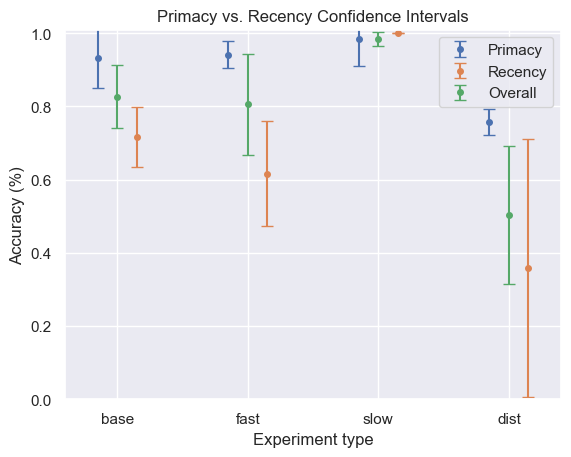

In [93]:
import numpy as np
from scipy import stats

def conf(data, total_guesses_per_round):
    n_rounds = len(data)
    proportions = data / total_guesses_per_round
    mean_prop = np.mean(proportions)
    std_prop = np.std(proportions, ddof=1)

    alpha = 0.05
    t_crit = stats.t.ppf(1 - alpha/2, df=n_rounds-1)
    margin = t_crit * (std_prop / np.sqrt(n_rounds))
    
    return mean_prop, margin

means = []
margins = []

for data in tests:
    m, margin = conf(serial_get_bools(data).sum(0)[:3], serial_get_bools(data).shape[0])
    means.append(m)
    margins.append(margin)

means2 = []
margins2 = []

for data in tests:
    m, margin = conf(serial_get_bools(data).sum(0)[-3:], serial_get_bools(data).shape[0])
    means2.append(m)
    margins2.append(margin)


means_over = []
margins_over = []

for data in tests:
    m, margin = conf(serial_get_bools(data).sum(0), serial_get_bools(data).shape[0])
    means_over.append(m)
    margins_over.append(margin)

import seaborn as sns
sns.set_theme()
x = np.arange(len(means))
spacing = 1/(len(x)+1)
plt.errorbar(x-0.15, means, yerr=margins, fmt='o', markersize=4, capsize=4, label="Primacy")
plt.errorbar(x+0.15, means2, yerr=margins2, fmt='o', markersize=4, capsize=4, label="Recency")
plt.errorbar(x, means_over, yerr=margins_over, fmt='o', markersize=4, capsize=4, label="Overall")
plt.grid()
plt.xlim(-2*spacing, len(x)-1+2*spacing)
plt.xticks(x, labels)
plt.title("Primacy vs. Recency Confidence Intervals")
plt.xlabel("Experiment type")
plt.ylabel("Accuracy (%)")
plt.legend(loc="upper right")
plt.grid()
plt.ylim(0, 1.01)